[Indice](index.ipynb) | Previo: [Mecanica.Dinamica.Postulados](05.02.01.00.Mecanica.Dinamica.Postulados.ipynb) | Siguiente: [Mecanica.SistemasNoInerciales](05.03.00.00.Mecanica.SistemasNoInerciales.ipynb)

## 5.4. Sistemas de partículas
<a id='sistemas_particulas'></a>

Una vez definidas las cantidades y conceptos básicos de la mecánica y formulados los principios, postulados y teoremas que nos permiten describir el movimiento de partículas puntuales, tenemos los elementos necesarios para abordar la cinemática y dinámica de sistemas formados por muchas partículas.

Los sistemas considerados aquí, sin embargo, estarán constituidos por partículas que interactúan a distancia, con fuerzas relativamente débiles y en números relativamente pequeños.  La mecánica de sistemas con partículas unidas por fuerzas intensas y que mantienen su posición relativa de forma estable (cuerpos rígidos) o aquellos formados por *moles* de partículas individuales, y cuya mecánica es descrita por leyes empíricas macroscópicas o por reglas estadística, está más allá del interés del libro.

Una buena parte de los desarrollos teóricos contenidos en esta sección vienen originalmente del texto clásico de Goldstein, Poole \& Safko, "*Classical mechanics*" <cite data-cite="Goldstein2002"><a href="mybook.html#Goldstein2002">(Goldstein et al., 2002)</a></cite> y que estaremos citando con alguna frecuencia en el resto de este libro.

### 5.4.1. Fuerzas y centro de masa
<a id='fuerzas_centro_masa'></a>

Cada partícula en nuestro sistema esta sometida a dos tipos de fuerzas: (1) las fuerzas externas $\vec{F}^{E}_i$, producidas por cuerpos externos o campos diferentes a los producidos por las componentes del sistema y (2) las fuerzas entre las partículas $\vec{F}_{ij}$.  

La evolución del sistema se obtiene resolviendo simultáneamenete el conjunto de las e.d.m. de cada partícula, que se puede escribir en términos de las fuerzas externas e internas como:

\begin{equation}
\label{eq:edm_sistema_particulas}
\left\{m_i \ddot{\vec r_i} = \vec F^E_i+\sum_{j\neq i} \vec F_{ij}\right\}_N
\end{equation}

Si sumamos todas las e.d.m. y suponemos que las fuerzas entre partículas satisfacen la ley de acción y reacción (débil o fuerte), esto es $\vec{F}_{ji}=-\vec{F}_{ij}$, podemos escribir:

$$
\sum_i m_i \ddot{\vec r_i} = \sum_i \vec F^E_i
$$
o bien:

$$
\frac{\mathrm{d}^2}{\mathrm{d}t^2}\left(\sum_i m_i \vec{r}_i\right) = \sum_i \vec F^E_i
$$


Si definimos: 

\begin{equation}
\label{eq:centro_masa}
\vec R\equiv \frac{\sum_i m_i \vec{r}_i}{M}
\end{equation}
donde $M=\sum_i m_i$ es la masa total del sistema, las e.d.m. de todas las partículas del sistema se transforman en una sola ecuación, que tiene exactamente la misma forma que la e.d.m. de una sola partícula de masa $M$ y posición $\vec{R}$ sometida a una fuerza total $F^E=\sum_i \vec F^E_i$:

\begin{equation}
\label{eq:edm_sistema}
M\ddot{\vec R}=\vec F^E
\end{equation}

Esto sencillo resultado tiene implicaciones trascententales.  Significa, esencialmente, que muchos de las cantidades cinemáticas y dinámicas definidas hasta ahora para partículas indivuales, así como algunos de los resultados vistos antes, se aplican también cuando describimos sistemas de partículas, siempre y cuando nos ocupemos del movimiento de un punto imaginario localizado en la posición $\vec R$ dada por la Ec. ([centro_masa](#mjx-eqn-eq%3Acentro_masa)).  Llamamos a este punto el **centro de Masa** del sistema.

Para ilustrar numéricamente el concepto de centro de masa consideremos un sistema de $N$ partículas con posiciones y masas aleatorias sobre el plano xy.  

Para ello generemos valores uniformemente distribuidos en el intervalo $[0,100)$ que corresponderán a la masa de las partículas en kg.  La posición de las partículas se generara asumiendo que sus coordenadas se encuentran restringidas al interior de un cuadrado de lado 2 m y apoyado sobre el origen del sistema de coordenadas.  Por su lado, supondremos que las componentes de la velocidad están restringidas al intervalo $[-0.2,0.2]$ m/s.

El algoritmo para preparar las masas, posiciones y velocidades de las partículas será:

<a id='code:random_particles'></a>

In [219]:
#Número de partículas 
N=3

#Semilla de números aleatorios
from numpy.random import seed
seed(30)

#Valores aleatorios de las masas
from numpy.random import uniform
ms=uniform(0,100,size=N)

#Masa total
M=ms.sum()

#Tabla de posiciones
rs=uniform(0,2,size=(N,3))
#Ponemos todos los valores de z en 0
rs[:,2]=0

#Tabla de velocidades
vs=uniform(-0.2,0.2,size=(N,3))
#Ponemos todos los valores de vz en 0
vs[:,2]=0

In [220]:
from numpy import set_printoptions
set_printoptions(precision=2)
print(f"Masas:\n{ms}...")
print(f"Posiciones:\n{rs[:,:2]}\n...")
print(f"Velocidades:\n{vs[:,:2]}\n...")

Masas:
[64.41 38.07 66.3 ]...
Posiciones:
[[0.33 1.93]
 [1.98 0.47]
 [0.81 0.27]]
...
Velocidades:
[[ 0.01  0.11]
 [-0.16 -0.12]
 [-0.11 -0.1 ]]
...


> **Nota: semilla de números aleatorios.**<a id=''></a> La mayoría de los algoritmos de generación de números aleatorios, lo hacen partiendo de una *semilla entera*, a partir del cuál generan secuencias de números perfectamente predecibles pero que a los ojos de un ser humano parecen completamente al azar (pseudo-aleatorios).  

> En el Alg. ([random_particles](#code:random_particles)) hemos generado las propiedades del sistema físico fijando la semilla en un valor arbitrario de 30 (de allí el comando `seed(30)`.) De este modo, al correr este algorimo siempre obtendremos las mismas propiedades.  

> Si el lector desea generar un conjunto completamente diferente puede cambiar este número por cualquier otro (siempre que sea entero.)  Más interesante aún es comprobar el efecto que tienen eliminar (o comentar esta línea.)

Usando la Ec. ([centro_masa](#mjx-eqn-eq%3Acentro_masa)), podemos calcular la posición y velocidad del centro de masa con el siguiente algoritmo:

<a id='code:centro_masa'></a>

In [170]:
from numpy import array
R_CM=sum(ms[:,None]*rs)/M
V_CM=sum(ms[:,None]*vs)/M

In [171]:
print(f"Posición centro de masa: {R_CM[:2]}")
print(f"Velocidad centro de masa: {V_CM[:2]}")

Posición centro de masa: [0.89 0.95]
Velocidad centro de masa: [-0.08 -0.03]


> **Nota: Operaciones entre vectores y matrices.**<a id=''></a> En lo que queda de esta sección, pero también en algunos de los capítulos posteriores, nos enfrentaremos con mucha frecuencia a situaciones en las que es necesario realizar operaciones entre vectores y matrices (como `ms` y `rs` en el algoritmo anterior), que merecen un poco de atención.

> El cálculo, en una sola línea de código, de la posición del centro de masa que hicimos en el Alg. ([centro_masa](#code:centro_masa)) no es para nada trivial. 

> Si quisieramos hacerlo paso a paso el código (uno de los muchos posibles) sería bastante bastante engorroso: 

 ```python
  R_CM=[0,0,0]
  for i in range(3):
      for k in range(N):
          R_CM[i]=R_CM[i]+ms*rs[k,i]
 ```

> En este ineficiente algoritmo (el único posible en lenguajes como `C`), el primer ciclo `for` es para recorrer las componentes del vector `R_CM` y el segundo para recorrer las partículas del sistema.  

> Si tuvieramos que escribir todas las expresiones vectoriales usando algoritmos como aquel, este texto tendría miles de páginas y posiblemente se convertiría en un aburrido libro de "programación ineficiente" (cuando en realidad lo emocionante esta en la física.)  

> Hay cinco trucos entones que debemos reconocer para todos los algoritmos sucesivos:

> 1. Si queremos multiplicar un vector por una matrix, por ejemplo para calcular $\{m_i\vec{r}_i\}$ no podemos simplemente escribir `ms*rs` (aunque el sistema eventualmente no produzca ningún error el resultado será equivocado).  Para hacer correctamente esta multiplicación, debemos asegurarnos que `ms` (que es un vector de dimensiones $1\times N$, donde $N$ es el número de partículas) se convierta en un vector columna $N\times 1$.  El truco en `Python` para ello es escribir simplemente `ms[:,None]`.

> 2. Si queremos sumar las filas de una matrix $N\times M$ basta usar la rutina `sum` incorporada en la biblioteca base del lenguaje.  Así `sum(rs)` produce un vector de $M$ componentes que tiene la suma *vectorial* de todas las filas de la matriz `rs`.  Este y el anterior truco, son los que permiten escribir en una línea las componentes de $\vec R$: `R_CM=sum(ms[:,None]*rs)/M`.

> 3. Si queremos restar a la matriz `rs` un vector constante `R_CM`, la operación `rs-R_CM` producirá un error.  La razón es que el operador `-` asume que los dos arreglos tienen el mismo tamaño; en realidad `rs` es una matriz $N\times 3$ y `R_CM` un vector simple de 3 componentes.  Para restar cada fila de la matriz `rs` por el vector `R_CM` se debe usar la rutina `subtract` de `NumPy`: `subtrac(rs,R_CM)`.

> 4. Las operaciones vectoriales `cross` (producto cruz) y `dot` (producto punto) del paquete `NumPy`, aplicadas sobre dos matrices $N\times3$ (como las matrices de posiciones `rs` y velocidades `vs` de las partículas del sistema), realizan las operaciones fila por fila (cada fila de la matriz se considera un vector.)  Así `cross(rs,vs)` es igual al conjunto $\{\vec{r}_i\times\vec{v}_i\}$ y es en sí misma una matriz $N\times3$.  Lo mismo sucede con `dot(rs,rs)`, aunque en este último caso el resultado es un vector columna $N\times 1$ con los productos punto $\{\vec{r}_i\cdot\vec{r}_i\}$.

> 5. La operación `norm` (que esta en el subpaquete `linalg` de `NumPy`) y que permite calcular la magnitud euclidiana de un vector, se puede aplicar sobre una matriz como `vs` para obtener la magnitud de cada fila; pero no de cualquier manera.  `norm(vs)` devuelve un solo número.  Pero `norm(vs,axis=1)` devuelve la magnitud de cada fila (el `axis=1` le indica a `norm` que recorra la matriz por filas; alternativamente `axis=0` le dirá a que lo haga por columnas, que no es nuestro interés aquí.)  Así el código `norm(vs,axis=1)**2` permite calcular el conjunto $\{v_i^2\}$.

Un gráfico de la posición y velocidad de las partículas del sistema y de la posición y velocidad del centro de masa puede obtenerse con el siguiente algoritmo:

In [172]:
%matplotlib nbagg

<a id='code:grafico_sistema_ejemplo'></a>

<IPython.core.display.Javascript object>


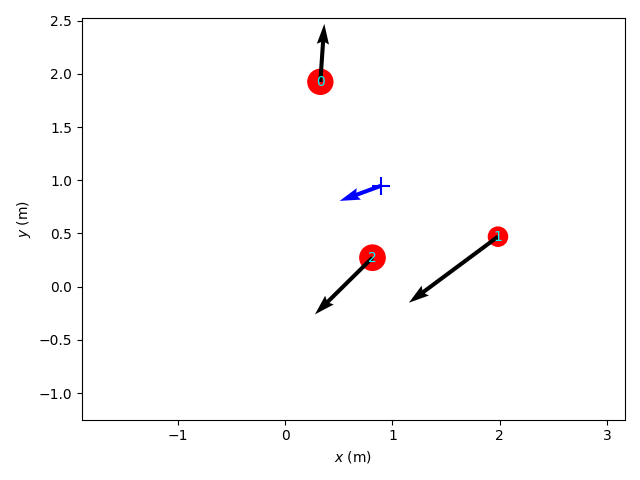

In [229]:
import matplotlib.pyplot as plt
fig=plt.figure();

#Etiquetas sobre las partículas
for i in range(N):
    plt.text(rs[i,0],rs[i,1],i,color="cyan",
             ha='center',va='center')

#Posiciones y velocidades de las partículas
plt.scatter(rs[:,0],rs[:,1],s=5*ms,c='red',marker='o')
plt.quiver(rs[:,0],rs[:,1],vs[:,0],vs[:,1],scale=1)

#Posiciones y velocidad del centro de masa
plt.scatter(R_CM[0],R_CM[1],s=M,c='blue',marker='+')
plt.quiver(R_CM[0],R_CM[1],V_CM[0],V_CM[1],color='blue',scale=1)

#Decoración
plt.xlabel("$x$ (m)");
plt.ylabel("$y$ (m)");

#Ajusta gráfico
from pymcel.plot import fija_ejes_proporcionales
fija_ejes_proporcionales(fig.gca(),(rs,R_CM),margin=0.4);
plt.tight_layout();
plt.show();



<a id='code:grafico_sistema_ejemplo'></a><center><b>Figura 5.48.</b> Un sistema de tres partículas.  El tamaño del círculo que representa cada partícula es proporcional a su masa.  La cruz y la flecha adherida a ella muestran la posición y velocidad del centro de masa.</center>

> **Nota: Escala de los ejes en el espacio.**<a id=''></a> La rutina `fija_ejes_proporcionales` del paquete `pymcel` que que viene con la versión electrónica de este libro y que utilizamos en el Alg. ([grafico_sistema_ejemplo](#code:grafico_sistema_ejemplo)), juega en ese algoritmo un papel muy importante.  

> En lo sucesivo, al representar la posición de partículas en el espacio coordenado, es indispensable que la escala de los ejes sea exactamente la misma. El lector puede verificar con una regla, que una unidad sobre el eje horizontal en la Figura ([code:grafico_sistema_ejemplo](#fig:code:grafico_sistema_ejemplo)) mide exactamente lo mismo que una unidad del eje vertical. De este modo las posiciones o los vectores representados no estarán deformados, un efecto que crea distorsiones en nuestra interpretación de esas cantidades (más adelante veremos que solo usando esta rutina, las trayectorias circulares apareceran efectivamente como círculos.)

> El código de esta rutina es muy elaborado como para reproducirlo en el libro.  El lector curiosos puede encontrar todos los algoritmos del paquete `pymcel` en el material distribuido con la [versión electrónica del libro](http://github.com/seap-udea/MecanicaCeleste-Zuluaga).

Podemos reunir todos los comandos usados en los algoritmos anteriores en una solo rutina:

In [174]:
def centro_masa_sistema(N=3,semilla=1):
    N=int(N)
    from numpy.random import seed
    seed(int(semilla))
    from numpy.random import uniform
    ms=uniform(0,100,size=N)
    M=ms.sum()
    rs=uniform(0,2,size=(N,3))
    rs[:,2]=0
    vs=uniform(-0.2,0.2,size=(N,3))
    vs[:,2]=0
    R_CM=sum(ms[:,None]*rs)/M
    V_CM=sum(ms[:,None]*vs)/M
    import matplotlib.pyplot as plt
    fig=plt.figure();
    for i in range(N):
        plt.text(rs[i,0],rs[i,1],i,color="cyan",
                 ha='center',va='center')
    plt.scatter(rs[:,0],rs[:,1],s=5*ms,c='red',marker='o')
    plt.quiver(rs[:,0],rs[:,1],vs[:,0],vs[:,1],scale=1)
    plt.scatter(R_CM[0],R_CM[1],s=M,c='blue',marker='+')
    plt.quiver(R_CM[0],R_CM[1],V_CM[0],V_CM[1],color='blue',scale=1)
    plt.xlabel("$x$ (m)");
    plt.ylabel("$y$ (m)");
    from pymcel.plot import fija_ejes_proporcionales
    fija_ejes_proporcionales(fig.gca(),(rs,R_CM),margin=0.4);
    plt.tight_layout();
    plt.show();

Para crear la figura interactiva mostrada a continuación y que permite ilustrar graficamente las propiedades del centro de masa:

In [175]:
from ipywidgets import interact,fixed,widgets
opciones=dict(continuous_update=False)

interact(centro_masa_sistema,
         N=widgets.FloatSlider(min=2,max=10,step=1,value=3,**opciones),
         semilla=widgets.FloatSlider(min=0,max=50,step=1,value=30,**opciones),
        );

interactive(children=(FloatSlider(value=3.0, continuous_update=False, description='N', max=10.0, min=2.0, step…

<a id='fig:05.02.02.00.Mecanica.Dinamica.SistemaParticulas_49'></a><center><b>Figura 5.49.</b> </center>

### 5.4.2. Centro de masa de un sistema de dos partículas
<a id='centro_masa'></a>

De particular de interés para la mecánica celeste son las propiedades del centro de masa de un sistema formado por solo dos partículas:

$$
\vec R_\mathrm{CM}=\frac{m_1 \vec r_1 + m_2 \vec r_2}{M}
$$

Es fácil mostrar que en este caso, el centro de masa siempre se encuentra en la línea que une a las dos partículas (ver problemas al final del capítulo.)

Si introducimos el vector relativo $\vec r\equiv\vec r_1-\vec r_2$, es posible mostrar que la posición de cada partícula se puede escribir en términos de la posición del centro de masa $\vec R_\mathrm{CM}$ y el vector $\vec r$ como:

\begin{eqnarray}
\vec r_1 & = & \vec{R}_\mathrm{CM} + \frac{m_2}{M} \vec r\\
\vec r_2 & = & \vec{R}_\mathrm{CM} - \frac{m_1}{M} \vec r
\end{eqnarray}

<a id='fig:centro_masa'></a>![Relación entre la posición del centro de masa $\vec R$, el vector relativo $\vec r=\vec{r}_1-\vec{r}_2$ y la posición de las partículas en un sistema de dos cuerpos.++t!++0.8++\label{fig:centro_masa}](./figures/horizontal_centro_masa.png)

<center><b>Figura 5.50</b>. Relación entre la posición del centro de masa $</center>

Como vemos la distancia del centro de masa a cada partícula es directamente proporcional a la masa de la otra partícula.  Así, si llamamos $\vec{r}_i'=\vec r_i-\vec R$ al vector que va del centro de masa a la posición de cada partícula, entonces:

\begin{equation}
\label{eq:distancia_centro_masa}
\frac{r_1'}{r_2'}=\frac{m_2}{m_1}
\end{equation}


> **Un poco de historia: Kepler y el centro de masa.**<a id=''></a> Muchos años antes de que Newton hubiera formalizado las leyes de la mecánica, antes de que apareciera el concepto de masa, fuerza o el postulado de acción y reacción, todos los cuales son requeridos para la deducción formal de la relación expresada en la Ec. ([distancia_centro_masa](#mjx-eqn-eq%3Adistancia_centro_masa)), Kepler había ya intuido este resultado.  En su obra cumbre *Astronomía Nueva* de 1609, presentó, entre los que denomino sus *8 axiomas de una teoría verdadera de la gravedad*, la siguiente afirmación:

![Primera página de la obra cumbre de Kepler *Astronomía Nova*.++w++0.5++\label{fig:astronomia_nova}](./figures/vertical_astronomia_nova.png)$$\mathrm{\mathbf{Figura\;5.51}.}$$

> > "*Si la Tierra y la Luna no fueran mantenidas en sus respectivas órbitas por una fuerza espiritual o de alguna otra naturaleza equivalente, la Tierra ascendería hacia la Luna 1/54 de la distancia y la Luna descendería las restantes 53 partes del intervalo y así se unirían.  Pero este cálculo presupone que ambos poseen la misma densidad*."[$^1$](06.03.00.00.ProblemaNCuerpos.TeoremaVirial.ipynb#notaspie_1) 

> Este hecho pone en evidencia dos cosas: (1) la clarividencia del matemático alemán, quién entre otras cosas además de la citada, intuyó algunas importantes propiedades de la gravedad y de sus efectos sobre el movimiento planetario 80 años antes que Newton y sus contemporáneos; y (2) que las ideas de la mecánica que hoy atribuímos exclusivamente a Newton estaban "flotando" en el ambiente intelectual de su época desde hacía casi 100 años. Newton, como lo sería también Maxwell un siglo y medio después en el caso de la electricidad y el magnetismo, fue en cierto sentido un compilador de la sabiduría "mecánica" de su época.

### 5.4.3. Teoremas de conservación
<a id='teoremas_conservacion'></a>

Usando la e.d.m. para un sistema de partículas (Ec. \ref{}) y algunas de las deducciones que ya habíamos realizado en el caso de partículas individuales, podemos deducir algunos teoremas mecánicas de gran importancia.

> **Proposición: Teorema de conservación del momentum lineal.**<a id='box:teo:conservacion.p.sistemas'></a> Si la fuerza externa total sobre un sistema de partículas es nula, el momentum total del sistema se mantiene constante.  En términos matemáticos:

  $$
  \vec{F}^\mathrm{E}=\sum_i \vec{F}_i^\mathrm{E}=0\Longleftrightarrow \vec{P}=\vec{P}_\mathrm{CM}
  $$
  
> Donde $\vec{P}_\mathrm{CM}$ es un vector constante.

Este teorema ocupa un lugar central en la mecánica y sus implicaciones no son para nada triviales. Piense tan solo en el hecho de que aún si un sistema contiene un enorme número de partículas, que rebotan entre sí o se dispersan unas contra otras, procesos en los cuáles el momento de las partículas se modifica de formas a veces inesperadas, la suma de todos los momentos individuales producirá siempre el mismo número.

Premultiplicamos ahora la e.d.m. en la Ec. ([edm_sistema](#mjx-eqn-eq%3Aedm_sistema)) por el factor integrante $\vec{r}_i\times$ y sumando sobre todas las partículas:

$$
\sum_i m_i r_i\times\ddot{r}_i=\sum_i\vec{r}_i\times\left(\vec{F}^E_i + \sum_{j\neq i}\vec{F}_{ij}\right)
$$

El lado izquierdo izquierdo de esta última ecuación se puede expresar en términos de cuadraturas (ver [la Sección *Integración de la e.d.m.*](05.01.02.00.Mecanica.Cinematica.SolucionEdM.ipynb#integracion_edm)), de modo que la ecuación adopta la forma más conveniente de:

$$
\frac{\mathrm{d}}{\mathrm{d}t}\left(\sum_i m_i r_i\times\dot{r}_i\right)=\vec{r}_i\times\sum\left(\vec{F}^E_i + \vec{F}_{ij}\right),
$$
donde reconocemos, del lado izquierdo al momento angular total $\vec L=\sum m_i\vec{r}_i\times\dot{\vec{r}}_i$ y del derecho la torca neta:

\begin{equation}
\label{eq:torca_sistema}
\vec \tau=\vec{r}_i\times\sum\left(\vec{F}^E_i + \vec{F}_{ij}\right).
\end{equation}

En términos de estas cantidades, la e.d.m. de un sistema de particulas se puede escribir, alternativamente, como:

\begin{equation}
\label{eq:dLdt_sistema_torca}
\dot{\vec{L}}=\tau
\end{equation}

Volvamos a la torca. Por el postulado de acción y reacción (Pos. [edm_sistema](05.02.01.00.Mecanica.Dinamica.Postulados.ipynb#box:pos:accion.reaccion)) las torcas de las fuerzas entre las partículas se pueden agrupar por pares de la forma:

$$
\vec r_k\times \vec F_{lk}+\vec r_l \times \vec F_{kl}=-\vec{r}_{lk}\times \vec F_{lk},
$$
donde $\vec{r}_{lk}=\vec{r}_l-\vec{r}_k$ es el vector relativo, y hemos usado índices $l,k$ distintos a los originales $i,j$ de la e.d.m. para evitar confusiones.

Si adicionalmente, las interacciones son tales que el postulado de acción y reacción fuerte se cumple, es decir si $\vec{r}_{lk}\parallel \vec{F}_{lk}$, entonces todas las torcas internas se cancelan mutuamente y como consecuencia:

\begin{equation}
\label{eq:torque_sistema}
\vec{\tau} = \sum \vec{r}_i\times \vec{F}^E_i,
\end{equation}
de donde, finamente, la e.d.m. del sistema de partículas (Ec. [dLdt_sistema_torca](#mjx-eqn-eq%3AdLdt_sistema_torca)) tiene la forma explícita:

$$
\dot{\vec{L}}=\sum \vec{r}_i\times \vec{F}^E_i
$$

Esta última ecuación conduce a un segundo importante teorema de conservación:

> **Proposición: Teorema de conservación del momentum angular.**<a id='box:teo:conservacion.L.sistemas'></a> Si la torca externa total sobre un sistema de partículas es nula, el momento angular total del sistema se mantiene constante.  En términos matemáticos:

  $$
  \vec{\tau} = \sum \vec{r}_i\times \vec{F}^E_i=\vec 0\Longleftrightarrow \vec{L}=\vec{L}_\mathrm{0}
  $$
  
> Donde $\vec{L}_\mathrm{0}$ es un vector constante.

Es claro que la condición básica del teorema de conservación del momento angular (torque neto nulo) se cumple también en el caso en el que las fuerzas externas son nulas.  Es decir, en un sistema aislado de partículas, tanto el momento lineal como el momento angular se conservan.

De nuevo, por trivial que nos parezca el teorema de conservación del momento angular, esta lejos de serlo.  La cantidad implicada aquí es mucho más compleja que el momento lineal y resulta sencillamente increíble que bajo una condición tan particular como la que supone el teorema, una combinación no trivial de cantidades cinemáticas produzcan un vector constante.

Pongamos a prueba el teorema usando el sistema de partículas que habíamos introducido en la [Sección *Fuerzas y centro de masa*](#fuerzas_centro_masa).  Para ello calculemos el momento angular total del sistema:

<a id='code:L_sistema_ejemplo'></a>

In [230]:
#Momento angular de cada partícula
from numpy import cross
Ls=ms[:,None]*cross(rs,vs)

#Momento angular total
L=sum(Ls)

In [231]:
print(f"Momentos angulares individuales:\n{Ls}")
print(f"Momento angular total:\n{L}")

Momentos angulares individuales:
[[ 0.    0.    1.35]
 [ 0.   -0.   -6.25]
 [ 0.   -0.   -3.72]]
Momento angular total:
[ 0.    0.   -8.62]


Propaguemos ahora sus posiciones y velocidades asumiendo que las partículas se mueven con velocidad constante, es decir, sin experimentan ninguna fuerza de interacción mutua, y más importante, ninguna fuerza externa.  En esta condición dinámica las velocidades no se modifican:

In [178]:
#Tiempo futuro
t=10.0

#Posición y velocidad de las partículas en t
rs_t=rs+10*vs
vs_t=vs

In [179]:
print(f"Posiciones iniciales: rs =\n{rs}")
print(f"Posiciones finales: vs =\n{rs_t}")

Posiciones iniciales: rs =
[[0.33 1.93 0.  ]
 [1.98 0.47 0.  ]
 [0.81 0.27 0.  ]]
Posiciones finales: rs =
[[ 0.4   2.99  0.  ]
 [ 0.34 -0.75  0.  ]
 [-0.25 -0.77  0.  ]]


Véamos ahora cuánto valen los momentos angulares individuales y total, después de que las partículas se propagaran:

In [180]:
#Momento angular de cada partícula
from numpy import cross
Ls_t=ms[:,None]*cross(rs_t,vs_t)

#Momento angular total
L_t=Ls_t.sum(axis=0)

In [232]:
print(f"Momentos angulares después:\n{Ls_t}")
print(f"Momento angular total después:\n{L_t}")

Momentos angulares después:
[[ 0.    0.    1.35]
 [ 0.   -0.   -6.25]
 [ 0.    0.   -3.72]]
Momento angular total después:
[ 0.    0.   -8.62]


El momento angular total después de la propagación resulta igual al momento angular antes de ella (Alg. [L_sistema_ejemplo](#code:L_sistema_ejemplo)) con lo que comprobamos que en la ausencia de fuerzas externas, incluso frente a modificaciones no triviales de las posiciones, el momento angular se mantiene constante.

### 5.4.4. Dinámica referida al centro de masa
<a id='dinamica_centro_masa'></a>

Una forma especial de las e.d.m. de un sistema de partículas, se obtiene cuando lo describimos desde un sistemade referencia "atado" del centro de masa (origen en el centro de masa y velocidad igual a él.)

Usando las transformaciones de Galileo (Pos. [L_sistema_ejemplo](05.01.01.00.Mecanica.Cinematica.Cantidades.ipynb#box:pos:transformaciones.galileo)) la posición y velocidad de cada partícula referida al centro de masa será (Ecs. [ley_adicion_velocidades](#mjx-eqn-eq%3Aley_adicion_velocidades) y [transformaciones_galileo](#mjx-eqn-eq%3Atransformaciones_galileo)):

\begin{equation}
\label{eq:estado_CM}
\begin{array}{rcl}
\vec r_i(t) & = & \vec R_\mathrm{CM}(t)+\vec{r}_i'(t)\\
\vec v_i(t) & = & \vec V_\mathrm{CM}(t)+\vec{v}_i'(t) \\
\end{array}
\end{equation}

Aquí, las cantidades primadas están referidas al nuevo sistema de referencia. En general $\vec{R}_\mathrm{CM}(t)=\int \vec{V}_\mathrm{CM}(t)\;\mathrm{d}t$ será la posición del centro de masa en $t$.

#### Momento angular total del sistema

En el sistema de referencia del centro de masa el momentum angular es:

$$
\begin{array}{rcl}
\vec L & = & \sum_i \vec r_i \times \vec p_i \\
       & = & \sum_i m_i(\vec R_\mathrm{CM}+\vec{r}_i')\times (\vec V_\mathrm{CM}+\vec{v}_i')\\
       & = & (\sum_i m_i)\vec R_\mathrm{CM}\times\vec V_\mathrm{CM}+\vec R_\mathrm{CM}\times(\sum_i m_i\vec{v}_i')+
             (\sum_i m_i\vec{r}_i')\times\vec{V_\mathrm{CM}}+
             \sum_i (m_i\vec{r}_i'\times\vec{v}_i')
\end{array}
$$

En esta expresión $\sum m_i\vec{r}_i'$ y $\sum m_i\vec{v}_i'$ son, respectivamente, vectores proporcionales a la posición y velocidad del centro de masa (ver Ec. [centro_masa](#mjx-eqn-eq%3Acentro_masa)), pero medidos en el sistema de referencia del mismo centro de masa; por definción, ambas cantidades son entonces nulas (para una sencilla comprobación numérica, ver algoritmos abajo.)  

Finalmente, el momento angular total del sistema se puede escribir como:

\begin{equation}
\label{eq:L_CM_interno}
\vec L = \vec R_\mathrm{CM}\times \vec P_\mathrm{CM} + \sum_i \vec r'_i\times \vec p'_i
\end{equation}
es decir, **el momento angular total de un sistema de partículas** es es igual a la suma del **momento angular del centro de masa** y el **momentum angular total de las partículas en el sistema de referencia del centro de masa**.

Nuevamente podemos comprobar este resultado usando el sistema de ejemplo que introdujimos en [la Sección *Fuerzas y centro de masa*](#fuerzas_centro_masa).  

Calculemos primero el momento angular del centro de masa del sistema:

In [211]:
#Momento angular del centro de masaa
from numpy import cross
L_CM=M*cross(R_CM,V_CM)

In [212]:
print(f"Momento angular del centro de masa:\n{L_CM}")

Momento angular del centro de masa:
[ 0.   -0.    7.96]


Para calcular el momento angular de las partículas en el sistema de referencia del centro de masa, debemos primero calcular la posición y velocidad de ellas en ese sistema usando las Ecs. ([estado_CM](#mjx-eqn-eq%3Aestado_CM)):

In [213]:
#Posición y velocidad referida al centro de masa
from numpy import subtract
rps=subtract(rs,R_CM)
vps=subtract(vs,V_CM)

In [214]:
print(f"Posiciones respecto al CM:\n{rps[:,:2]}")
print(f"Velocidades respecto al CM:\n{vps[:,:2]}")

Posiciones respecto al CM:
[[-0.56  0.98]
 [ 1.09 -0.48]
 [-0.08 -0.68]]
Velocidades respecto al CM:
[[ 0.08  0.13]
 [-0.09 -0.09]
 [-0.03 -0.08]]


Con este resultado podemos verificar la afirmación que habíamos hecho en la deducción de la Ec. ([L_CM_interno](#mjx-eqn-eq%3AL_CM_interno)), en la que habíamos dicho que $\sum m_i\vec{r}_i'$ y $\sum m_i\vec{v}_i'$ son vectores nulos:

In [215]:
R_CM_CM=sum(ms[:,None]*rps)/M
V_CM_CM=sum(ms[:,None]*vps)/M

In [216]:
print(f"Posiciones del CM respecto al CM:\n{R_CM_CM[:2]}")
print(f"Posiciones del CM respecto al CM:\n{V_CM_CM[:2]}")

Posiciones del CM respecto al CM:
[1.53e-16 0.00e+00]
Posiciones del CM respecto al CM:
[-3.95e-18  5.26e-18]


Hecha esta verificación, podemos ahora calcular el momento angular total de las partículas en el sistema de referencia del centro de masa:

In [217]:
#Momento angular de cada partícula
from numpy import cross
Lps=ms[:,None]*cross(rps,vps)

#Momento angular total
Lp=sum(Lps)

In [218]:
print(f"Momento angular total referido al centro de masa:\n{Lp}")

Momento angular total referido al centro de masa:
[  0.     0.   -16.58]


Ciertamente este vector no coincide con el momentum angular total referido al origen que habíamos calculado en el Alg. ([L_sistema_ejemplo](#code:L_sistema_ejemplo)); pero esto es natural puesto que no hemos sumado el momento angular del centro de masa que calculamos antes:

In [192]:
#Momento angular total
L=L_CM+Lp

In [193]:
print(f"Momento angular total:\n{L}")

Momento angular total:
[ 0.    0.   -8.62]


Que coincide con el obtenida con el Alg. ([L_sistema_ejemplo](#code:L_sistema_ejemplo)).  Con esto hemos comprobado la relación expresada en la Ec. ([L_CM_interno](#mjx-eqn-eq%3AL_CM_interno)).

#### Energía cinética total del sistema

Una relación similar a la encontrada en la Ec. ([L_CM_interno](#mjx-eqn-eq%3AL_CM_interno)) para el momento angular, puede deducirse también para el caso de la energía cinética total $K$.  

Usando el teorema del trabajo y energía (Teo. [L_CM_interno](05.02.01.00.Mecanica.Dinamica.Postulados.ipynb#box:teo:trabajo.energia)) puede probarse que en el caso de un sistema de partículas $K$ es:

$$
K=\frac{1}{2}\sum m_i v_i^2
$$

Reemplazando en esta expresión la velocidad de cada partícula en el sistema original por su velocidad en el sistema de referencia del centro de masa, $\vec{v}_i=\vec{v}_i'+\vec{V}$  (Ec. [estado_CM](#mjx-eqn-eq%3Aestado_CM)) se obtiene:

$$
K=
\frac{1}{2}\sum m_i \vec V^2+
\vec V\cdot\frac{\mathrm{d}}{\mathrm{d}t}\left(\sum m_i \vec{r}_i'\right)+
\frac{1}{2}\sum m_i\vec{v}_i'^2
$$
de donde por los mismos argumentos en la deducción de la Ec. ([L_CM_interno](#mjx-eqn-eq%3AL_CM_interno)) obtenemos finalmente:

\begin{equation}
\label{eq:K_CM_interno}
K = \frac{1}{2} M V^2 + \frac{1}{2} \sum m_i {v_i}'^2,
\end{equation}
es decir la **energía cinética total del sistema** es igual a **la energía cinética del centro de masa** más **la energía cinética total referida al centro de masa** (energía interna.)

De nuevo podemos verificar este resultado usando el sistema de ejemplo.  

Para ello, primero calculemos la energía cinética total usando las velocidades referidas al sistema de referencia original:

<a id='code:K_sistema_ejemplo'></a>

In [204]:
#Magnitud de las velocidades de las partículas
from numpy.linalg import norm
vmags=norm(vs,axis=1)

#Energía cinética individual de cada partícula
Ks=0.5*ms*vmags**2

#Energía cinética total
K=sum(Ks)

In [209]:
print(f"Energía cinética de las partículas:\n{Ks}")
print(f"Energía cinética total: {K:.2f}")

Energía cinética de las partículas:
[0.37 0.79 0.73]
Energía cinética total: 1.90


Ahora podemos hacerlo usando la nueva expresión:

In [206]:
#Energía cinética del centro de masa:
K_CM=0.5*M*norm(V_CM)**2

#Magnitud de las velocidades
vpmags=norm(vps,axis=1)

#Energía cinética individual de cada partícula
Kps=0.5*ms*vpmags**2

#Energía cinética en el centro de masa
Kp=Kps.sum()

#Energía total
K=K_CM+Kp

In [210]:
print(f"Energía cinética del CM: {K_CM}")
print(f"Energía cinética de las partículas (respecto al CM): {Kps}")
print(f"Energía cinética total (respecto al CM): {Kp:.2f}")
print(f"Energía cinética total: {K:.2f}")

Energía cinética del CM: 0.5505136059795793
Energía cinética de las partículas (respecto al CM): [0.8  0.32 0.22]
Energía cinética total (respecto al CM): 1.35
Energía cinética total: 1.90


De nuevo, la energía cinética calculada con la Ec. ([K_CM_interno](#mjx-eqn-eq%3AK_CM_interno)) coincide con la obtenida en el Alg. ([K_sistema_ejemplo](#code:K_sistema_ejemplo)).

**NOTAS AL PIE:**

<a id='notaspie_1'></a>
1. En realidad el centro de masa del sistema Tierra-Luna esta a 1/81 de la distancia entre ambos (la masa de la Tierra es 81 veces la de la Luna.)  Sin embargo, la estimación de Kepler, como bien lo aclara al final de esta cita sin que terminemos de entenderle, se basaba en la suposición de que la masa de nuestro satélite se puede estimar exclusivamente a partir de su tamaño.  Usando el valor contemporáneo del radio de la Luna y de la Tierra, la masa estimada de nuestro satélite, a partir de su tamaño y suponiendo densidades iguales, sería $(R_\mathrm{Luna}/R_\mathrm{Tierra})^3=(1737/6371)^3=1/49$ de la masa de la Tierra, que es cercano al valor de 1/54 usado por Kepler.



[Indice](index.ipynb) | Previo: [Mecanica.Dinamica.Postulados](05.02.01.00.Mecanica.Dinamica.Postulados.ipynb) | Siguiente: [Mecanica.SistemasNoInerciales](05.03.00.00.Mecanica.SistemasNoInerciales.ipynb)